## Test with ResNet in pytorch

In [3]:
from trainer import Trainer
from resnet import fineTuneResNet50,lessFilterResNet50, resnet50
import pandas as pd
import numpy as np
%matplotlib notebook

In [4]:
train_df = pd.read_json('Data/combined_training.json')
print(train_df.shape)

(1604, 1003)


In [5]:
print(np.array(train_df.ix[0, 'band_mixed']).shape)

(75, 75, 3)


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [6]:
np.array(train_df.ix[0, 'band_mixed'])

array([[[55, 60, 48],
        [56, 57, 48],
        [53, 54, 48],
        ..., 
        [57, 57, 48],
        [56, 56, 47],
        [49, 59, 48]],

       [[53, 54, 47],
        [54, 51, 48],
        [55, 54, 47],
        ..., 
        [56, 50, 47],
        [52, 58, 47],
        [48, 61, 47]],

       [[53, 50, 47],
        [55, 45, 48],
        [58, 54, 48],
        ..., 
        [55, 54, 47],
        [54, 53, 47],
        [45, 56, 47]],

       ..., 
       [[52, 59, 47],
        [53, 59, 47],
        [50, 56, 47],
        ..., 
        [52, 63, 47],
        [56, 60, 47],
        [56, 59, 47]],

       [[48, 57, 47],
        [54, 57, 47],
        [53, 57, 47],
        ..., 
        [55, 59, 47],
        [55, 60, 47],
        [54, 52, 47]],

       [[52, 56, 47],
        [55, 58, 47],
        [55, 59, 47],
        ..., 
        [55, 57, 47],
        [54, 59, 47],
        [54, 58, 47]]])

In [7]:
#model, unused_dict = modResNet18(pretrained=True, skip_headers=['bn2', 'fc'])

In [8]:
#print(unused_dict.keys())

In [9]:
from sklearn.model_selection import KFold
fold_num = 5

In [10]:
import torch

## Testing Different Augementation Strategies on Networks

In [11]:
is_transfer_learning = False

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, valid = train_test_split(train_df, test_size=0.2, random_state=519)
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
print(train.shape, valid.shape)

(1283, 1003) (321, 1003)


In [14]:
np.array(train.ix[0, 'band_mixed'])

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([[[71, 66, 47],
        [70, 66, 48],
        [67, 66, 48],
        ..., 
        [66, 67, 48],
        [65, 67, 47],
        [67, 69, 48]],

       [[72, 67, 47],
        [71, 67, 47],
        [65, 65, 48],
        ..., 
        [73, 66, 47],
        [68, 69, 47],
        [67, 69, 47]],

       [[70, 64, 47],
        [72, 68, 47],
        [70, 66, 48],
        ..., 
        [76, 66, 47],
        [72, 66, 47],
        [67, 69, 47]],

       ..., 
       [[67, 65, 47],
        [64, 63, 47],
        [66, 62, 47],
        ..., 
        [69, 62, 47],
        [69, 63, 47],
        [72, 65, 47]],

       [[73, 63, 47],
        [70, 59, 47],
        [67, 56, 47],
        ..., 
        [60, 65, 47],
        [70, 64, 47],
        [75, 64, 47]],

       [[72, 64, 47],
        [73, 65, 47],
        [71, 63, 47],
        ..., 
        [68, 67, 47],
        [72, 67, 47],
        [74, 63, 47]]])

gpu: 0  available: True
Model in use:
LessFilterResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (layer1): Sequential (
    (0): DropBottleneck (
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (downsample): Sequential (
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affi

<IPython.core.display.Javascript object>


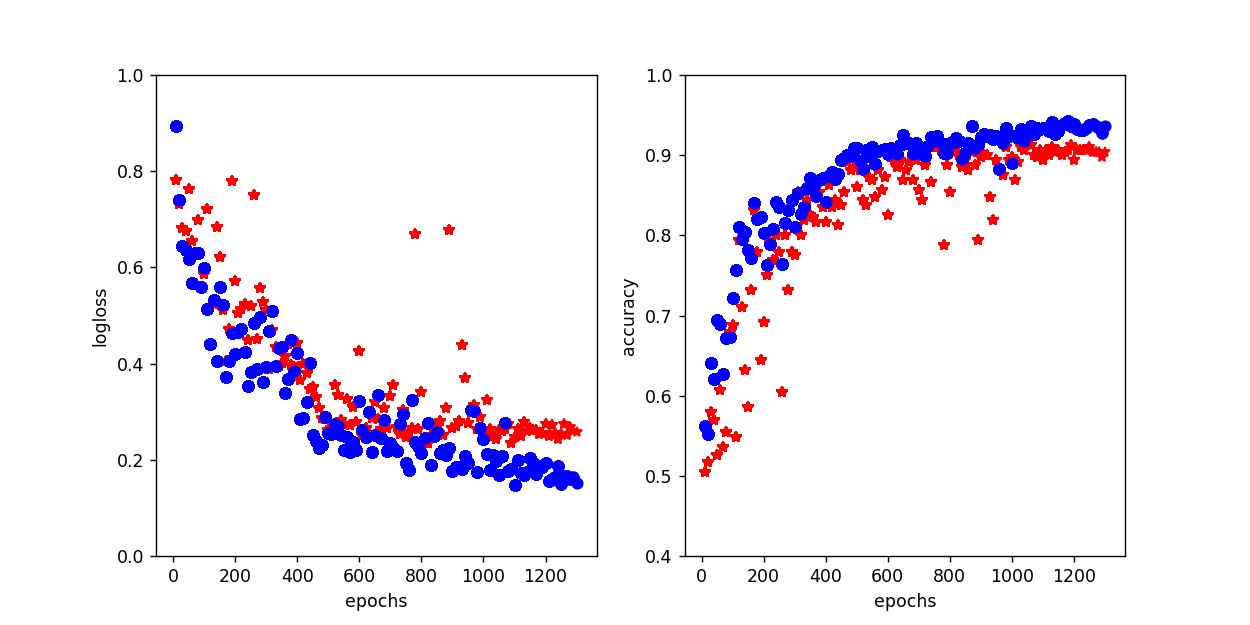

epoch= 10: Train set: Average loss: 0.8930, Accuracy: 721/1283 (56.20%)
Valid set: Average loss: 0.7813, Accuracy: 162/321 (50.47%)
best_loss updated:  0.7813359101613363
epoch= 20: Train set: Average loss: 0.7403, Accuracy: 709/1283 (55.26%)
Valid set: Average loss: 0.7312, Accuracy: 166/321 (51.71%)
best_loss updated:  0.7312094767888387
epoch= 30: Train set: Average loss: 0.6437, Accuracy: 822/1283 (64.07%)
Valid set: Average loss: 0.6831, Accuracy: 186/321 (57.94%)
best_loss updated:  0.6831038196881613
epoch= 40: Train set: Average loss: 0.6362, Accuracy: 796/1283 (62.04%)
Valid set: Average loss: 0.6749, Accuracy: 183/321 (57.01%)
best_loss updated:  0.6748588482538859
epoch= 50: Train set: Average loss: 0.6178, Accuracy: 891/1283 (69.45%)
Valid set: Average loss: 0.7641, Accuracy: 169/321 (52.65%)
epoch= 60: Train set: Average loss: 0.5669, Accuracy: 885/1283 (68.98%)
Valid set: Average loss: 0.6543, Accuracy: 195/321 (60.75%)
best_loss updated:  0.654273251692454
epoch= 70: Tra

epoch= 580: Train set: Average loss: 0.2365, Accuracy: 1163/1283 (90.65%)
Valid set: Average loss: 0.3100, Accuracy: 275/321 (85.67%)
epoch= 590: Train set: Average loss: 0.2204, Accuracy: 1165/1283 (90.80%)
Valid set: Average loss: 0.2785, Accuracy: 280/321 (87.23%)
epoch= 600: Train set: Average loss: 0.3223, Accuracy: 1156/1283 (90.10%)
Valid set: Average loss: 0.4270, Accuracy: 265/321 (82.55%)
epoch= 610: Train set: Average loss: 0.2626, Accuracy: 1167/1283 (90.96%)
Valid set: Average loss: 0.2521, Accuracy: 288/321 (89.72%)
best_loss updated:  0.25213747719923657
epoch= 620: Train set: Average loss: 0.2487, Accuracy: 1162/1283 (90.57%)
Valid set: Average loss: 0.2675, Accuracy: 287/321 (89.41%)
epoch= 630: Train set: Average loss: 0.2999, Accuracy: 1156/1283 (90.10%)
Valid set: Average loss: 0.2530, Accuracy: 284/321 (88.47%)
epoch= 640: Train set: Average loss: 0.2175, Accuracy: 1171/1283 (91.27%)
Valid set: Average loss: 0.2864, Accuracy: 287/321 (89.41%)
epoch= 650: Train set:

Valid set: Average loss: 0.2539, Accuracy: 291/321 (90.65%)
epoch= 1190: Train set: Average loss: 0.1858, Accuracy: 1201/1283 (93.61%)
Valid set: Average loss: 0.2566, Accuracy: 293/321 (91.28%)
epoch= 1200: Train set: Average loss: 0.1937, Accuracy: 1205/1283 (93.92%)
Valid set: Average loss: 0.2738, Accuracy: 287/321 (89.41%)
epoch= 1210: Train set: Average loss: 0.1556, Accuracy: 1197/1283 (93.30%)
Valid set: Average loss: 0.2491, Accuracy: 291/321 (90.65%)
epoch= 1220: Train set: Average loss: 0.1614, Accuracy: 1195/1283 (93.14%)
Valid set: Average loss: 0.2722, Accuracy: 291/321 (90.65%)
epoch= 1230: Train set: Average loss: 0.1656, Accuracy: 1195/1283 (93.14%)
Valid set: Average loss: 0.2568, Accuracy: 291/321 (90.65%)
epoch= 1240: Train set: Average loss: 0.1871, Accuracy: 1198/1283 (93.37%)
Valid set: Average loss: 0.2434, Accuracy: 291/321 (90.65%)
epoch= 1250: Train set: Average loss: 0.1502, Accuracy: 1203/1283 (93.76%)
Valid set: Average loss: 0.2532, Accuracy: 292/321 (90.

In [16]:
model = lessFilterResNet50()
# testing snap shot for essemble
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.001)

tr = Trainer(
        model,
        optimizer,
        epochs=1300,
        milestones=[300, 1000, 1200],
        gamma=0.2,
        batch_size=128, 
        use_cuda=True, 
        gpu_idx=0)

data_augmentation_args = {
    'mirror': False, # not useful here
    'rotate': True,
    'scale': True,
    'translation': True,
    #'color jitter' : True,
}
tr.train(train, valid_df = valid, is_transfer_learning=is_transfer_learning, data_augmentation_args=data_augmentation_args)



In [17]:
del model, optimizer, tr

## Cross Validation

## cross validate less filter ResNet5

gpu: 0  available: True
Model in use:
LessFilterResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (layer1): Sequential (
    (0): DropBottleneck (
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (downsample): Sequential (
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affi

<IPython.core.display.Javascript object>


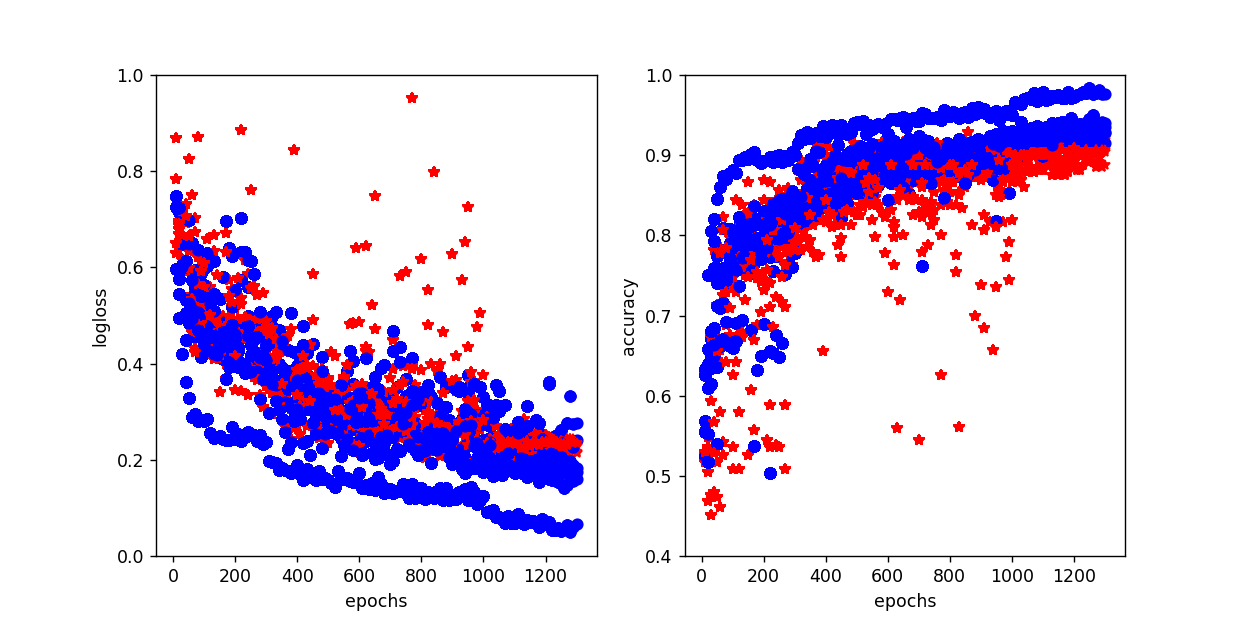

epoch= 10: Train set: Average loss: 1.2111, Accuracy: 730/1283 (56.90%)
Valid set: Average loss: 0.7834, Accuracy: 169/321 (52.65%)
best_loss updated:  0.7834033767382304
epoch= 20: Train set: Average loss: 0.5754, Accuracy: 820/1283 (63.91%)
Valid set: Average loss: 0.6970, Accuracy: 162/321 (50.47%)
best_loss updated:  0.6969930728276571
epoch= 30: Train set: Average loss: 0.6560, Accuracy: 861/1283 (67.11%)
Valid set: Average loss: 0.7040, Accuracy: 153/321 (47.66%)
epoch= 40: Train set: Average loss: 0.5064, Accuracy: 974/1283 (75.92%)
Valid set: Average loss: 0.5317, Accuracy: 251/321 (78.19%)
best_loss updated:  0.531653900941213
epoch= 50: Train set: Average loss: 0.5066, Accuracy: 951/1283 (74.12%)
Valid set: Average loss: 0.5918, Accuracy: 229/321 (71.34%)
epoch= 60: Train set: Average loss: 0.5246, Accuracy: 910/1283 (70.93%)
Valid set: Average loss: 0.5434, Accuracy: 186/321 (57.94%)
epoch= 70: Train set: Average loss: 0.4585, Accuracy: 1039/1283 (80.98%)
Valid set: Average 

Valid set: Average loss: 0.3218, Accuracy: 281/321 (87.54%)
epoch= 590: Train set: Average loss: 0.2990, Accuracy: 1118/1283 (87.14%)
Valid set: Average loss: 0.2923, Accuracy: 288/321 (89.72%)
best_loss updated:  0.29233528176943463
epoch= 600: Train set: Average loss: 0.2615, Accuracy: 1132/1283 (88.23%)
Valid set: Average loss: 0.2606, Accuracy: 289/321 (90.03%)
best_loss updated:  0.26056405901908875
epoch= 610: Train set: Average loss: 0.2415, Accuracy: 1152/1283 (89.79%)
Valid set: Average loss: 0.3009, Accuracy: 278/321 (86.60%)
epoch= 620: Train set: Average loss: 0.4121, Accuracy: 1143/1283 (89.09%)
Valid set: Average loss: 0.4263, Accuracy: 256/321 (79.75%)
epoch= 630: Train set: Average loss: 0.2585, Accuracy: 1129/1283 (88.00%)
Valid set: Average loss: 0.4234, Accuracy: 271/321 (84.42%)
epoch= 640: Train set: Average loss: 0.2496, Accuracy: 1144/1283 (89.17%)
Valid set: Average loss: 0.2878, Accuracy: 282/321 (87.85%)
epoch= 650: Train set: Average loss: 0.2712, Accuracy: 1

Valid set: Average loss: 0.2538, Accuracy: 287/321 (89.41%)
epoch= 1180: Train set: Average loss: 0.2555, Accuracy: 1177/1283 (91.74%)
Valid set: Average loss: 0.2522, Accuracy: 284/321 (88.47%)
epoch= 1190: Train set: Average loss: 0.2502, Accuracy: 1172/1283 (91.35%)
Valid set: Average loss: 0.2419, Accuracy: 294/321 (91.59%)
epoch= 1200: Train set: Average loss: 0.2071, Accuracy: 1172/1283 (91.35%)
Valid set: Average loss: 0.2331, Accuracy: 287/321 (89.41%)
best_loss updated:  0.23311466972033182
epoch= 1210: Train set: Average loss: 0.2161, Accuracy: 1180/1283 (91.97%)
Valid set: Average loss: 0.2303, Accuracy: 291/321 (90.65%)
best_loss updated:  0.23029986023902893
epoch= 1220: Train set: Average loss: 0.1903, Accuracy: 1176/1283 (91.66%)
Valid set: Average loss: 0.2294, Accuracy: 291/321 (90.65%)
best_loss updated:  0.22940454383691153
epoch= 1230: Train set: Average loss: 0.1954, Accuracy: 1173/1283 (91.43%)
Valid set: Average loss: 0.2347, Accuracy: 289/321 (90.03%)
epoch= 124

epoch= 10: Train set: Average loss: 1.1420, Accuracy: 674/1283 (52.53%)
Valid set: Average loss: 0.7408, Accuracy: 166/321 (51.71%)
best_loss updated:  0.7408406535784403
epoch= 20: Train set: Average loss: 0.7152, Accuracy: 782/1283 (60.95%)
Valid set: Average loss: 0.6696, Accuracy: 171/321 (53.27%)
best_loss updated:  0.6695824066797892
epoch= 30: Train set: Average loss: 0.6486, Accuracy: 833/1283 (64.93%)
Valid set: Average loss: 0.6172, Accuracy: 216/321 (67.29%)
best_loss updated:  0.617192546526591
epoch= 40: Train set: Average loss: 0.6125, Accuracy: 834/1283 (65.00%)
Valid set: Average loss: 0.6094, Accuracy: 217/321 (67.60%)
best_loss updated:  0.6093805432319641
epoch= 50: Train set: Average loss: 0.6488, Accuracy: 816/1283 (63.60%)
Valid set: Average loss: 0.6346, Accuracy: 207/321 (64.49%)
epoch= 60: Train set: Average loss: 0.6519, Accuracy: 859/1283 (66.95%)
Valid set: Average loss: 0.5712, Accuracy: 211/321 (65.73%)
best_loss updated:  0.5711575150489807
epoch= 70: Tra

epoch= 580: Train set: Average loss: 0.4055, Accuracy: 1129/1283 (88.00%)
Valid set: Average loss: 0.2343, Accuracy: 294/321 (91.59%)
epoch= 590: Train set: Average loss: 0.2351, Accuracy: 1143/1283 (89.09%)
Valid set: Average loss: 0.2329, Accuracy: 284/321 (88.47%)
epoch= 600: Train set: Average loss: 0.2308, Accuracy: 1178/1283 (91.82%)
Valid set: Average loss: 0.2174, Accuracy: 286/321 (89.10%)
best_loss updated:  0.21739680071671805
epoch= 610: Train set: Average loss: 0.2102, Accuracy: 1170/1283 (91.19%)
Valid set: Average loss: 0.2499, Accuracy: 285/321 (88.79%)
epoch= 620: Train set: Average loss: 0.3029, Accuracy: 1122/1283 (87.45%)
Valid set: Average loss: 0.4339, Accuracy: 260/321 (81.00%)
epoch= 630: Train set: Average loss: 0.3365, Accuracy: 1160/1283 (90.41%)
Valid set: Average loss: 0.2646, Accuracy: 281/321 (87.54%)
epoch= 640: Train set: Average loss: 0.3526, Accuracy: 1145/1283 (89.24%)
Valid set: Average loss: 0.2411, Accuracy: 291/321 (90.65%)
epoch= 650: Train set:

Valid set: Average loss: 0.2152, Accuracy: 298/321 (92.83%)
epoch= 1190: Train set: Average loss: 0.1790, Accuracy: 1214/1283 (94.62%)
Valid set: Average loss: 0.2392, Accuracy: 289/321 (90.03%)
epoch= 1200: Train set: Average loss: 0.1698, Accuracy: 1201/1283 (93.61%)
Valid set: Average loss: 0.2512, Accuracy: 285/321 (88.79%)
epoch= 1210: Train set: Average loss: 0.1615, Accuracy: 1199/1283 (93.45%)
Valid set: Average loss: 0.2101, Accuracy: 292/321 (90.97%)
epoch= 1220: Train set: Average loss: 0.1580, Accuracy: 1197/1283 (93.30%)
Valid set: Average loss: 0.2295, Accuracy: 291/321 (90.65%)
epoch= 1230: Train set: Average loss: 0.2495, Accuracy: 1201/1283 (93.61%)
Valid set: Average loss: 0.2250, Accuracy: 291/321 (90.65%)
epoch= 1240: Train set: Average loss: 0.1542, Accuracy: 1197/1283 (93.30%)
Valid set: Average loss: 0.2118, Accuracy: 294/321 (91.59%)
epoch= 1250: Train set: Average loss: 0.2023, Accuracy: 1213/1283 (94.54%)
Valid set: Average loss: 0.2214, Accuracy: 292/321 (90.

epoch= 10: Train set: Average loss: 0.7263, Accuracy: 712/1283 (55.49%)
Valid set: Average loss: 0.8693, Accuracy: 170/321 (52.96%)
best_loss updated:  0.8693363269170126
epoch= 20: Train set: Average loss: 0.5457, Accuracy: 845/1283 (65.86%)
Valid set: Average loss: 0.6889, Accuracy: 172/321 (53.58%)
best_loss updated:  0.6888925035794576
epoch= 30: Train set: Average loss: 0.5984, Accuracy: 873/1283 (68.04%)
Valid set: Average loss: 0.6013, Accuracy: 197/321 (61.37%)
best_loss updated:  0.6013276775677999
epoch= 40: Train set: Average loss: 0.5319, Accuracy: 879/1283 (68.51%)
Valid set: Average loss: 0.6918, Accuracy: 182/321 (56.70%)
epoch= 50: Train set: Average loss: 0.4847, Accuracy: 994/1283 (77.47%)
Valid set: Average loss: 0.8246, Accuracy: 152/321 (47.35%)
epoch= 60: Train set: Average loss: 0.4889, Accuracy: 961/1283 (74.90%)
Valid set: Average loss: 0.4650, Accuracy: 252/321 (78.50%)
best_loss updated:  0.46499759952227276
epoch= 70: Train set: Average loss: 0.5597, Accurac

Valid set: Average loss: 0.2720, Accuracy: 279/321 (86.92%)
epoch= 570: Train set: Average loss: 0.3292, Accuracy: 1161/1283 (90.49%)
Valid set: Average loss: 0.2753, Accuracy: 280/321 (87.23%)
epoch= 580: Train set: Average loss: 0.3024, Accuracy: 1145/1283 (89.24%)
Valid set: Average loss: 0.4847, Accuracy: 266/321 (82.87%)
epoch= 590: Train set: Average loss: 0.2344, Accuracy: 1157/1283 (90.18%)
Valid set: Average loss: 0.2707, Accuracy: 282/321 (87.85%)
epoch= 600: Train set: Average loss: 0.2396, Accuracy: 1159/1283 (90.34%)
Valid set: Average loss: 0.2792, Accuracy: 288/321 (89.72%)
epoch= 610: Train set: Average loss: 0.2448, Accuracy: 1150/1283 (89.63%)
Valid set: Average loss: 0.3204, Accuracy: 281/321 (87.54%)
epoch= 620: Train set: Average loss: 0.2400, Accuracy: 1151/1283 (89.71%)
Valid set: Average loss: 0.2601, Accuracy: 287/321 (89.41%)
best_loss updated:  0.2600688288609187
epoch= 630: Train set: Average loss: 0.2524, Accuracy: 1145/1283 (89.24%)
Valid set: Average loss

Valid set: Average loss: 0.2379, Accuracy: 285/321 (88.79%)
epoch= 1160: Train set: Average loss: 0.1775, Accuracy: 1190/1283 (92.75%)
Valid set: Average loss: 0.2114, Accuracy: 294/321 (91.59%)
epoch= 1170: Train set: Average loss: 0.1745, Accuracy: 1187/1283 (92.52%)
Valid set: Average loss: 0.2113, Accuracy: 295/321 (91.90%)
epoch= 1180: Train set: Average loss: 0.2302, Accuracy: 1197/1283 (93.30%)
Valid set: Average loss: 0.2118, Accuracy: 293/321 (91.28%)
epoch= 1190: Train set: Average loss: 0.2133, Accuracy: 1168/1283 (91.04%)
Valid set: Average loss: 0.2153, Accuracy: 291/321 (90.65%)
epoch= 1200: Train set: Average loss: 0.2013, Accuracy: 1190/1283 (92.75%)
Valid set: Average loss: 0.2080, Accuracy: 296/321 (92.21%)
epoch= 1210: Train set: Average loss: 0.1791, Accuracy: 1180/1283 (91.97%)
Valid set: Average loss: 0.2183, Accuracy: 295/321 (91.90%)
epoch= 1220: Train set: Average loss: 0.2108, Accuracy: 1185/1283 (92.36%)
Valid set: Average loss: 0.2153, Accuracy: 292/321 (90.

epoch= 10: Train set: Average loss: 0.7476, Accuracy: 713/1283 (55.57%)
Valid set: Average loss: 0.6518, Accuracy: 202/321 (62.93%)
best_loss updated:  0.6518378456433614
epoch= 20: Train set: Average loss: 0.5947, Accuracy: 709/1283 (55.26%)
Valid set: Average loss: 0.6806, Accuracy: 176/321 (54.83%)
epoch= 30: Train set: Average loss: 0.6057, Accuracy: 814/1283 (63.45%)
Valid set: Average loss: 0.7183, Accuracy: 145/321 (45.17%)
epoch= 40: Train set: Average loss: 0.4486, Accuracy: 1017/1283 (79.27%)
Valid set: Average loss: 0.7309, Accuracy: 154/321 (47.98%)
epoch= 50: Train set: Average loss: 0.6978, Accuracy: 692/1283 (53.94%)
Valid set: Average loss: 0.6646, Accuracy: 166/321 (51.71%)
epoch= 60: Train set: Average loss: 0.5747, Accuracy: 850/1283 (66.25%)
Valid set: Average loss: 0.7515, Accuracy: 148/321 (46.11%)
epoch= 70: Train set: Average loss: 0.5947, Accuracy: 919/1283 (71.63%)
Valid set: Average loss: 0.7037, Accuracy: 169/321 (52.65%)
epoch= 80: Train set: Average loss: 

Valid set: Average loss: 0.3231, Accuracy: 266/321 (82.87%)
epoch= 590: Train set: Average loss: 0.2790, Accuracy: 1132/1283 (88.23%)
Valid set: Average loss: 0.3544, Accuracy: 264/321 (82.24%)
epoch= 600: Train set: Average loss: 0.3399, Accuracy: 1083/1283 (84.41%)
Valid set: Average loss: 0.4876, Accuracy: 234/321 (72.90%)
epoch= 610: Train set: Average loss: 0.3387, Accuracy: 1111/1283 (86.59%)
Valid set: Average loss: 0.3576, Accuracy: 267/321 (83.18%)
epoch= 620: Train set: Average loss: 0.3091, Accuracy: 1126/1283 (87.76%)
Valid set: Average loss: 0.3406, Accuracy: 262/321 (81.62%)
epoch= 630: Train set: Average loss: 0.3185, Accuracy: 1142/1283 (89.01%)
Valid set: Average loss: 0.3120, Accuracy: 272/321 (84.74%)
epoch= 640: Train set: Average loss: 0.2917, Accuracy: 1120/1283 (87.30%)
Valid set: Average loss: 0.5211, Accuracy: 231/321 (71.96%)
epoch= 650: Train set: Average loss: 0.3718, Accuracy: 1104/1283 (86.05%)
Valid set: Average loss: 0.3218, Accuracy: 273/321 (85.05%)
ep

epoch= 1180: Train set: Average loss: 0.1844, Accuracy: 1179/1283 (91.89%)
Valid set: Average loss: 0.2452, Accuracy: 282/321 (87.85%)
epoch= 1190: Train set: Average loss: 0.2441, Accuracy: 1169/1283 (91.11%)
Valid set: Average loss: 0.2425, Accuracy: 287/321 (89.41%)
epoch= 1200: Train set: Average loss: 0.1884, Accuracy: 1177/1283 (91.74%)
Valid set: Average loss: 0.2377, Accuracy: 286/321 (89.10%)
epoch= 1210: Train set: Average loss: 0.3578, Accuracy: 1171/1283 (91.27%)
Valid set: Average loss: 0.2488, Accuracy: 283/321 (88.16%)
epoch= 1220: Train set: Average loss: 0.2153, Accuracy: 1170/1283 (91.19%)
Valid set: Average loss: 0.2445, Accuracy: 283/321 (88.16%)
epoch= 1230: Train set: Average loss: 0.1906, Accuracy: 1180/1283 (91.97%)
Valid set: Average loss: 0.2366, Accuracy: 285/321 (88.79%)
epoch= 1240: Train set: Average loss: 0.2063, Accuracy: 1175/1283 (91.58%)
Valid set: Average loss: 0.2254, Accuracy: 287/321 (89.41%)
epoch= 1250: Train set: Average loss: 0.2070, Accuracy:

epoch= 10: Train set: Average loss: 1.2655, Accuracy: 804/1284 (62.62%)
Valid set: Average loss: 0.6310, Accuracy: 201/320 (62.81%)
best_loss updated:  0.6310044129689535
epoch= 20: Train set: Average loss: 0.7244, Accuracy: 665/1284 (51.79%)
Valid set: Average loss: 0.6914, Accuracy: 150/320 (46.88%)
epoch= 30: Train set: Average loss: 0.6007, Accuracy: 789/1284 (61.45%)
Valid set: Average loss: 0.6667, Accuracy: 190/320 (59.38%)
epoch= 40: Train set: Average loss: 0.6125, Accuracy: 852/1284 (66.36%)
Valid set: Average loss: 0.7072, Accuracy: 169/320 (52.81%)
epoch= 50: Train set: Average loss: 0.5264, Accuracy: 914/1284 (71.18%)
Valid set: Average loss: 0.6000, Accuracy: 210/320 (65.62%)
best_loss updated:  0.5999535719553629
epoch= 60: Train set: Average loss: 0.4934, Accuracy: 967/1284 (75.31%)
Valid set: Average loss: 0.5344, Accuracy: 249/320 (77.81%)
best_loss updated:  0.5344193975130717
epoch= 70: Train set: Average loss: 0.5081, Accuracy: 975/1284 (75.93%)
Valid set: Average 

Valid set: Average loss: 0.2336, Accuracy: 291/320 (90.94%)
best_loss updated:  0.2336197296778361
epoch= 590: Train set: Average loss: 0.2859, Accuracy: 1124/1284 (87.54%)
Valid set: Average loss: 0.6396, Accuracy: 249/320 (77.81%)
epoch= 600: Train set: Average loss: 0.3290, Accuracy: 1168/1284 (90.97%)
Valid set: Average loss: 0.2288, Accuracy: 291/320 (90.94%)
best_loss updated:  0.22880076368649802
epoch= 610: Train set: Average loss: 0.2148, Accuracy: 1163/1284 (90.58%)
Valid set: Average loss: 0.3098, Accuracy: 284/320 (88.75%)
epoch= 620: Train set: Average loss: 0.2802, Accuracy: 1179/1284 (91.82%)
Valid set: Average loss: 0.6449, Accuracy: 244/320 (76.25%)
epoch= 630: Train set: Average loss: 0.2881, Accuracy: 1173/1284 (91.36%)
Valid set: Average loss: 1.8257, Accuracy: 179/320 (55.94%)
epoch= 640: Train set: Average loss: 0.2145, Accuracy: 1171/1284 (91.20%)
Valid set: Average loss: 0.3377, Accuracy: 274/320 (85.62%)
epoch= 650: Train set: Average loss: 0.2029, Accuracy: 11

In [9]:
kf = KFold(n_splits=fold_num, shuffle=True, random_state=519)
counter  = 1
mean_err = 0

for train_index, valid_index in kf.split(train_df):
     
    
    is_transfer_learning = False
    model = lessFilterResNet50()
    model_name = 'Trained_model/less_filter_resent50_' + str(counter) + '.db'
    # testing snap shot for essemble
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.001)

    tr = Trainer(
            model,
            optimizer,
            epochs=1300,
            milestones=[300, 1000, 1200],
            gamma=0.2,
            batch_size=128, 
            use_cuda=True, 
            gpu_idx=0,
            best_model_name=model_name
            )
    
    train = train_df.loc[train_index].reset_index(drop=True)
    valid = train_df.loc[valid_index].reset_index(drop=True)

    data_augmentation_args = {
        'mirror': False, # not useful here
        'rotate': True,
        'scale': True,
        'translation': True,
        #'color jitter' : True,
    }
    tr.train(train, valid_df=valid, is_transfer_learning=is_transfer_learning, data_augmentation_args=data_augmentation_args)

    counter += 1
    del model, tr, optimizer

#### Five fold records
* losses: 0.229, 0.198, 0.208, 0.22, 0.224
* avg loss: 0.2158
* accuracies: 90.65%, 91.90%, 91.59%, 89.10%, 90.31%
* avg acc: 90.71%

Public LB: 0.1685

In [10]:
model = lessFilterResNet50()
model_name = 'Trained_model/less_filter_resent50_all.db'
    
# testing snap shot for essemble
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.001)

tr = Trainer(
        model,
        optimizer,
        epochs=1300,
        milestones=[300, 1000, 1200],
        gamma=0.2,
        batch_size=128, 
        use_cuda=True, 
        gpu_idx=0,
        best_model_name=model_name)

data_augmentation_args = {
    'mirror': False, # not useful here
    'rotate': True,
    'scale': True,
    'translation': True,
    #'color jitter' : True,
}
tr.train(train_df, is_transfer_learning=is_transfer_learning, data_augmentation_args=data_augmentation_args)
tr.save(model_name)
del model, optimizer, tr

gpu: 0  available: True
Model in use:
LessFilterResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (layer1): Sequential (
    (0): DropBottleneck (
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (downsample): Sequential (
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affi

epoch= 10: Train set: Average loss: 0.5972, Accuracy: 1017/1604 (63.40%)
epoch= 20: Train set: Average loss: 0.4954, Accuracy: 1204/1604 (75.06%)
epoch= 30: Train set: Average loss: 0.4203, Accuracy: 1293/1604 (80.61%)
epoch= 40: Train set: Average loss: 0.3621, Accuracy: 1317/1604 (82.11%)
epoch= 50: Train set: Average loss: 0.3296, Accuracy: 1357/1604 (84.60%)
epoch= 60: Train set: Average loss: 0.2887, Accuracy: 1380/1604 (86.03%)
epoch= 70: Train set: Average loss: 0.2950, Accuracy: 1403/1604 (87.47%)
epoch= 80: Train set: Average loss: 0.2810, Accuracy: 1396/1604 (87.03%)
epoch= 90: Train set: Average loss: 0.2836, Accuracy: 1408/1604 (87.78%)
epoch= 100: Train set: Average loss: 0.2819, Accuracy: 1414/1604 (88.15%)
epoch= 110: Train set: Average loss: 0.2850, Accuracy: 1408/1604 (87.78%)
epoch= 120: Train set: Average loss: 0.2570, Accuracy: 1435/1604 (89.46%)
epoch= 130: Train set: Average loss: 0.2449, Accuracy: 1434/1604 (89.40%)
epoch= 140: Train set: Average loss: 0.2487, Ac

epoch= 1120: Train set: Average loss: 0.0747, Accuracy: 1556/1604 (97.01%)
epoch= 1130: Train set: Average loss: 0.0673, Accuracy: 1563/1604 (97.44%)
epoch= 1140: Train set: Average loss: 0.0761, Accuracy: 1561/1604 (97.32%)
epoch= 1150: Train set: Average loss: 0.0710, Accuracy: 1564/1604 (97.51%)
epoch= 1160: Train set: Average loss: 0.0726, Accuracy: 1559/1604 (97.19%)
epoch= 1170: Train set: Average loss: 0.0697, Accuracy: 1558/1604 (97.13%)
epoch= 1180: Train set: Average loss: 0.0612, Accuracy: 1571/1604 (97.94%)
epoch= 1190: Train set: Average loss: 0.0765, Accuracy: 1558/1604 (97.13%)
epoch= 1200: Train set: Average loss: 0.0664, Accuracy: 1561/1604 (97.32%)
epoch= 1210: Train set: Average loss: 0.0719, Accuracy: 1564/1604 (97.51%)
epoch= 1220: Train set: Average loss: 0.0538, Accuracy: 1566/1604 (97.63%)
epoch= 1230: Train set: Average loss: 0.0540, Accuracy: 1570/1604 (97.88%)
epoch= 1240: Train set: Average loss: 0.0586, Accuracy: 1568/1604 (97.76%)
epoch= 1250: Train set: A

## Predict

In [9]:
test_df = pd.read_json('Data/test.json')
print(test_df.shape)
test_df.head(5)

(8424, 4)


,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",4023181e,32.615072
2,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",4371c8c3,43.918874


In [10]:
test_ids = test_df['id']
print(test_ids)

0       5941774d
1       4023181e
2       b20200e4
3       e7f018bb
4       4371c8c3
5       a8d9b1fd
6       29e7727e
7       92a51ffb
8       c769ac97
9       aee0547d
10      565b28ac
11      e04e9775
12      8e8161d1
13      4cf4d256
14      139e5324
15      f156976f
16      68a117cc
17      d9aa7a56
18      9005b143
19      5f6d3988
20      9ad70954
21      b9087b9e
22      a39a1427
23      82fbe8ed
24      1fae4879
25      6dd8f13d
26      bbad5958
27      54527583
28      be8fa29c
29      81a3328f
          ...   
8394    8ae30ce6
8395    de27ed88
8396    66d5196f
8397    d85f1858
8398    16dcb33a
8399    eca3158e
8400    08daeee6
8401    e9c513ee
8402    b1519fa6
8403    dfc89540
8404    8fd8c0e9
8405    45df6347
8406    bf7928d7
8407    7b587c05
8408    c2834388
8409    146143c3
8410    d59aee00
8411    cbc0b93b
8412    088e2ff7
8413    673d33cd
8414    674b031e
8415    43db4207
8416    156855e1
8417    ac96cfb0
8418    fe45aef5
8419    16ee9b50
8420    5a599eb7
8421    df30d6

In [11]:
del test_df

In [12]:
test_df = pd.read_json('Data/combined_test.json')
#test_df.reset_index(drop=True, inplace=True)
print(test_df.columns)
test_df.head(3)

Index(['band_mixed', 'inc_angle', 'is_iceberg'], dtype='object')


,band_mixed,inc_angle,is_iceberg
0,"[[[91, 77, 48], [92, 78, 48], [88, 74, 48], [8...",34.966400,0
1,"[[[64, 71, 48], [64, 71, 47], [64, 71, 47], [6...",32.615072,0
10,"[[[87, 69, 48], [89, 72, 48], [86, 72, 48], [7...",35.782900,0


In [13]:
test_df.sort_index(inplace=True)
test_df.head(5)

,band_mixed,inc_angle,is_iceberg
0,"[[[91, 77, 48], [92, 78, 48], [88, 74, 48], [8...",34.966400,0
1,"[[[64, 71, 48], [64, 71, 47], [64, 71, 47], [6...",32.615072,0
2,"[[[95, 101, 48], [94, 101, 48], [91, 100, 48],...",37.505433,0
3,"[[[98, 74, 48], [96, 72, 48], [92, 74, 48], [9...",34.473900,0
4,"[[[67, 73, 48], [64, 71, 48], [62, 75, 48], [6...",43.918874,0


### check if preprocessed and original test data matches the sequence (prevent forget-to-reset_index error...)

In [14]:
is_transfer_learning = False
model = lessFilterResNet50()
# testing snap shot for essemble
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.001)

tr = Trainer(
        model,
        optimizer,
        epochs=1800,
        milestones=[300, 1100, 1600],
        gamma=0.2,
        batch_size=128, 
        use_cuda=True, 
        gpu_idx=0)

data_augmentation_args = {
    'mirror': False, # not useful here
    'rotate': True,
    'scale': True,
    'translation': True,
    #'color jitter' : True,
}
tr.load('Trained_model/less_filter_resent50_all.db')
predictions = tr.test(test_df, is_transfer_learning=is_transfer_learning)

del model, optimizer, tr

gpu: 0  available: True
Model in use:
LessFilterResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (layer1): Sequential (
    (0): DropBottleneck (
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (downsample): Sequential (
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affi

Using:
 [<torchvision.transforms.transforms.ToPILImage object at 0x000001E532224048>, <torchvision.transforms.transforms.ToTensor object at 0x000001E532224208>]
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(104, 1)


In [15]:
predictions = predictions.reshape((predictions.shape[0],))
print(predictions[:10])
print(predictions.shape)

[  2.40571739e-04   5.17799333e-03   7.46687874e-05   9.99246478e-01
   8.82943219e-04   2.47403956e-03   1.34727883e-03   9.99104083e-01
   3.12092336e-04   3.98847740e-04]
(8424,)


In [16]:
submission = pd.DataFrame()
submission['id'] = test_ids
submission['is_iceberg'] = predictions
submission.to_csv('Submissions/submission_resnet50_all.csv', float_format="%.15f", index=False)

In [17]:
print(pd.Series(predictions > 0.5).value_counts())

False    4994
True     3430
dtype: int64


In [18]:
submission = pd.DataFrame()
submission['id'] = test_ids
submission['is_iceberg'] = np.zeros((len(test_ids),))
    
for counter in range(fold_num):

    is_transfer_learning = False
    model = lessFilterResNet50()
    model_name = 'Trained_model/less_filter_resent50_' + str(counter+1)+ '.db'
    # testing snap shot for essemble
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.001)

    tr = Trainer(
            model,
            optimizer,
            epochs=1800,
            milestones=[300, 1100, 1600],
            gamma=0.2,
            batch_size=128, 
            use_cuda=True, 
            gpu_idx=0,
            best_model_name = model_name)
    
    tr.load_checkpoint()
    predictions = tr.test(test_df, is_transfer_learning=is_transfer_learning)
    predictions = predictions.reshape((predictions.shape[0],))
    submission['is_iceberg'] += predictions
    
    del model, optimizer, tr
    
submission['is_iceberg'] /= fold_num * 1.0
submission.to_csv('Submissions/submission_resnet50_out_of_fold_avg.csv', float_format="%.15f", index=False)    

gpu: 0  available: True
Model in use:
LessFilterResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (layer1): Sequential (
    (0): DropBottleneck (
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (downsample): Sequential (
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affi

Using:
 [<torchvision.transforms.transforms.ToPILImage object at 0x000001E3040105F8>, <torchvision.transforms.transforms.ToTensor object at 0x000001E304002E80>]
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(104, 1)
gpu: 0  available: True
Model in use:
LessFilterResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool):

Using:
 [<torchvision.transforms.transforms.ToPILImage object at 0x000001E53220A0F0>, <torchvision.transforms.transforms.ToTensor object at 0x000001E53220A438>]
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(104, 1)
gpu: 0  available: True
Model in use:
LessFilterResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool):

Using:
 [<torchvision.transforms.transforms.ToPILImage object at 0x000001E304019BE0>, <torchvision.transforms.transforms.ToTensor object at 0x000001E304019080>]
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(104, 1)
gpu: 0  available: True
Model in use:
LessFilterResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool):

Using:
 [<torchvision.transforms.transforms.ToPILImage object at 0x000001E304023978>, <torchvision.transforms.transforms.ToTensor object at 0x000001E304023400>]
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(104, 1)
gpu: 0  available: True
Model in use:
LessFilterResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool):

Using:
 [<torchvision.transforms.transforms.ToPILImage object at 0x000001E30401AEF0>, <torchvision.transforms.transforms.ToTensor object at 0x000001E30401A198>]
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(128, 1)
(104, 1)


In [19]:
sub_all = pd.read_csv('Submissions/submission_resnet50_all.csv')
sub_comb = pd.read_csv('Submissions/submission_resnet50_out_of_fold_avg.csv')
print(pd.Series(sub_all['is_iceberg'] > 0.5).value_counts())
print(pd.Series(sub_comb['is_iceberg'] > 0.5).value_counts())

result1 = sub_all['is_iceberg'] > 0.5
result2 = sub_comb['is_iceberg'] > 0.5
print(pd.Series(result1 == result2).value_counts())

False    4994
True     3430
Name: is_iceberg, dtype: int64
False    6386
True     2038
Name: is_iceberg, dtype: int64
True     6404
False    2020
Name: is_iceberg, dtype: int64


## cross validate fine-tune @ fc layers

In [ ]:
kf = KFold(n_splits=fold_num, shuffle=True, random_state=519)
counter  = 0
mean_err = 0

for train_index, valid_index in kf.split(train_df):
     
    is_transfer_learning = True
    model, to_train_dict = fineTuneResNet50(pretrained=True)

    print("Dict. to train:")
    print(to_train_dict.keys())
    
    # set only the parameters in to_train_dict to train
    # others: requires_grad = False
    to_train_parmas = []
    for name, param in model.named_parameters():
        if name in to_train_dict.keys():
            print('\nTrain params:', name)
            to_train_parmas.append(param)
        else:
            print(name, end=" ")
            param.requires_grad = False
    
    optimizer = torch.optim.Adam(to_train_parmas, lr=0.01, weight_decay=0.001)
    
    '''
    is_transfer_learning = False
    model = lessFilterResNet50()
    # testing snap shot for essemble
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)
    '''
    tr = Trainer(
            model,
            optimizer,
            epochs=1000,
            milestones=[50, 600],
            gamma=0.1,
            batch_size=128, 
            use_cuda=True, 
            gpu_idx=0)
    train = train_df.loc[train_index].reset_index(drop=True)
    valid = train_df.loc[valid_index].reset_index(drop=True)

    tr.train(train, valid_df=valid, is_transfer_learning=is_transfer_learning)
    
    counter += 1
    tr.save('Trained_model/fine_tune_resent50_' + str(counter) + '.db')
    del model, tr, optimizer